## ANALYSIS OF APPS IN APPLE iOS APP STORE 


If you are buying a smartphone, chances are that it will run one of the two operating systems: Apple's iOS or Google's android. The most useful tool/app is playstore for android and appstore for Apple. There are about 2.5 million android apps and 1.8 million iOS apps. Analyzing the apps' statistics helps developers to find the right characteristics their app should have to achieve maximum number of downloads.

I'll be analyzing appstore apps using the appleStore.csv [dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/download) from [Kaggle](https://www.kaggle.com/). My goal is to load, clean and visualize appstore data to understand the iOS app market

### appleStore.csv

This dataset contains 16 columns
1. "id" : App ID
2. "track_name": App Name
3. "size_bytes": Size (in Bytes)
4. "currency": Currency Type
5. "price": Price amount
6. "ratingcounttot": User Rating counts (for all version)
7. "ratingcountver": User Rating counts (for current version)
8. "user_rating" : Average User Rating value (for all version)
9. "userratingver": Average User Rating value (for current version)
10. "ver" : Latest version code
11. "cont_rating": Content Rating
12. "prime_genre": Primary Genre
13. "sup_devices.num": Number of supporting devices
14. "ipadSc_urls.num": Number of screenshots showed for display
15. "lang.num": Number of supported languages
16. "vpp_lic": Vpp Device Based Licensing Enabled



In [1]:
#Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Installing plotly
#Run the following on command prompt solved my issue.
#conda install -c https://conda.anaconda.org/plotly plotly. 

import plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [2]:
#Reading in dataset
app_store = pd.read_csv("appleStore.csv",index_col=0) 

In [3]:
#Checking for presence of duplicates
print("Number of duplicates in app_store = ",app_store.duplicated().sum())
print("Number of apps = ",app_store.shape[0])

Number of duplicates in app_store =  0
Number of apps =  7197


There are no duplicated rows and the total number of apps in the dataset is 7197.

In [4]:
#Concise summary of the dataframes
print("APP_STORE\n")
app_store.info()


#Random sample of n rows
n=5
print("\nAPP_STORE\n")
app_store.sample(n)



APP_STORE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 955.9+ KB

APP_STORE



,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
51,293523031,Sonos Controller,107983872,USD,0.00,48905,2691,4.5,4.5,7.2,4+,Music,37,4,12,1
3384,901722848,Find my Fitbit - Finder app for lost fitbits,23547904,USD,5.99,2007,116,4.0,4.5,2.6.2,4+,Health & Fitness,37,5,1,1
4765,1001286466,Minecraft: Story Mode,1089228800,USD,0.00,20621,6745,4.0,4.5,1.6,9+,Games,38,4,1,1
1453,514205253,Majiang Mahjong（单机+川麻+二人+武汉+国标）,74442752,USD,0.00,1007,3,5.0,2.5,3.762,12+,Games,43,5,1,1
2759,769737983,Bowling King,174499840,USD,0.00,60271,114,4.5,4.0,1.40.23,4+,Games,38,4,1,1


### DATA CLEANING

The columns i'll be working with are id, track_name, size_bytes, currency, price, rating_count_tot, user_rating, prime_genre. So, for simplicity, i'll be removing the other columns from the dataframe.


In [5]:
#Dropping columns
app_store.drop(columns=["rating_count_ver","user_rating_ver","ver","sup_devices.num","ipadSc_urls.num","lang.num","vpp_lic"],inplace=True)

In [6]:
#Converting the size column from bytes to Mega Bytes
app_store["size_bytes"] = app_store["size_bytes"].apply(lambda x : x/(1024*1024))


In [7]:
#Rounding the column values to two decimal places
app_store["size_bytes"] = app_store["size_bytes"].round(decimals=2)

#Renaming the column
app_store.rename(columns={"size_bytes":"size_MB"},inplace=True)

In [8]:
app_store.head()

,id,track_name,size_MB,currency,price,rating_count_tot,user_rating,cont_rating,prime_genre
1,281656475,PAC-MAN Premium,96.12,USD,3.99,21292,4.0,4+,Games
2,281796108,Evernote - stay organized,151.23,USD,0.00,161065,4.0,4+,Productivity
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",95.87,USD,0.00,188583,3.5,4+,Weather
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",122.56,USD,0.00,262241,4.0,12+,Shopping
5,282935706,Bible,88.48,USD,0.00,985920,4.5,4+,Reference


### EXPLORING APP GENRES
I'll try to answer to the following questions
1. Are there any genres that dominate tha App Store?
2. Which genre has the most number of apps?
3. Which genre has the fewest number of apps?


In [9]:
#Number of unique categories
n_genres = len(app_store["prime_genre"].unique())
print("Number of unique genres = ",n_genres)

#Number of apps in each genre
print("\n----------------------------\nNumber of apps in each genre\n----------------------------\n")
n_apps_genre = app_store["prime_genre"].value_counts().sort_values(ascending=False)
print(n_apps_genre)

Number of unique genres =  23

----------------------------
Number of apps in each genre
----------------------------

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64


Most of the apps belong to the games genre and it dominates the market. Catalog contains least number of apps

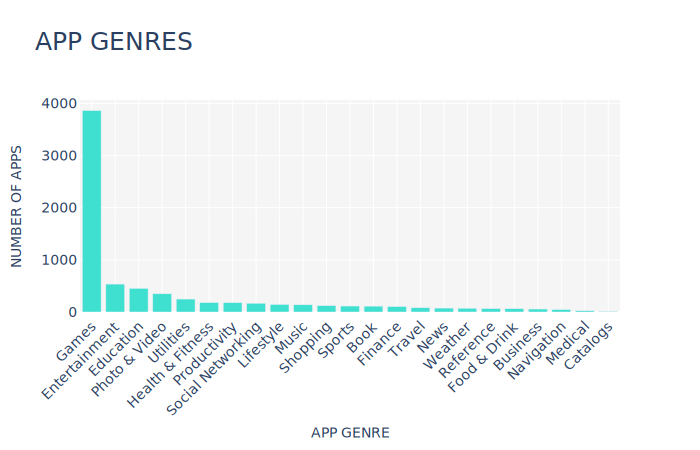

In [10]:
#Visualizing the data using plotly

fig = go.Figure(data=[go.Bar(x = n_apps_genre.index, y = n_apps_genre.values,marker_color='turquoise')])


fig.update_layout(
    
    title="APP GENRES",
    xaxis=dict(title="APP GENRE",titlefont_size=14),
    yaxis=dict(title="NUMBER OF APPS",titlefont_size=14),
    font=dict(
        family="Rockwell",
        size=18,
        
    ),
    plot_bgcolor="whitesmoke"
)
fig.update_xaxes(tickangle=-45, tickfont=dict(family='Rockwell', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', size=14))


fig.show(renderer="svg")


There are 23 unique genres present in the dataset. It is clear from the bar plot that games genre dominates the app Store. Entertainmenr, Education and Photo video are also some of the popular genres. The genre that is least popular/has least number of apps is Catalogs.

### ANALYZING THE RATINGS

After having analyzed each genre and their market share, I'll move on to analyzing the average ratings. Rating ranges from 1 to 5 and it is one of the most important key performance indicators as it largely affects the brand image.

In [11]:
#Average rating
avg_rating = app_store["user_rating"].mean()
print("Average Rating = ",avg_rating)

Average Rating =  3.526955675976101


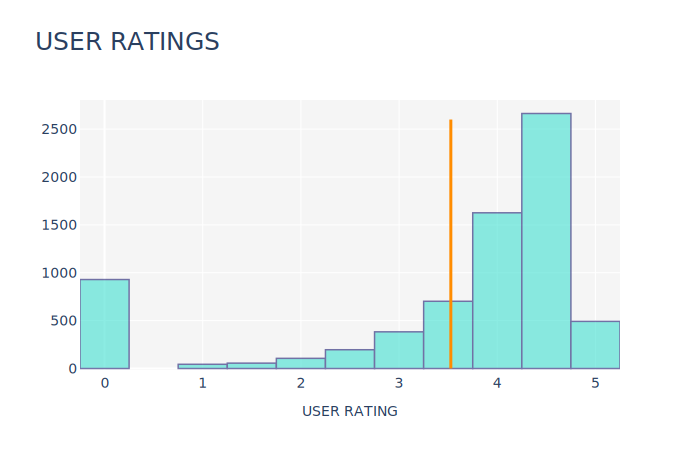

In [12]:
#Visualizing
fig = go.Figure(data=[go.Histogram(x = app_store["user_rating"],)])
fig.update_traces(marker_color='turquoise', marker_line_color='midnightblue',
                  marker_line_width=1.5, opacity=0.6)
#fig = go.Figure(data = [go.Histogram(x=app_store["user_rating"])])

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=avg_rating,
            y0=0,
            x1=avg_rating,
            y1=2600,
            line=dict(
                color="DarkOrange",
                width=3
            )))
fig.update_layout(
    
    title="USER RATINGS",
    xaxis=dict(title="USER RATING",titlefont_size=14),
    font=dict(
        family="Rockwell",
        size=18,
        
    ),
    plot_bgcolor="whitesmoke"
)
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', size=14))

fig.show(renderer="svg")



The average rating across all the apps is 3.53. From the histogram above, it is clear that the plot is skewed to the left, which indicates that most of the apps have high ratings. Although, some apps have a rating of 0. We'll explore those apps to find the reason for their low ratings.

In [13]:
#Apps with '0' rating
rating_0 = app_store[(app_store["user_rating"]==0)].shape[0]
print("Number of apps with rating of 0 = ",rating_0)

#Number of apps with user rating of 0 and with total count of ratings of 0
rating_0_tot_0 = app_store[(app_store["user_rating"]==0) & (app_store["rating_count_tot"]==0)].shape[0]
print("Number of apps with rating 0 and zero number of ratings = ",rating_0_tot_0)


Number of apps with rating of 0 =  929
Number of apps with rating 0 and zero number of ratings =  929


We can see that apps with zero number of ratings are assigned a rating of 0. So the user rating for the apps ranges from 1 to 5.

### ANALYZING SIZE AND PRICE

App's price and size affects the number of downloads and ratings. Generally, users prefer free apps over priced apps. Even if they prefer priced apps, the app's content should satisfy the users, to obtain high ratings. So ratings largely depends on the price. When it comes to the size, if the app's size is too large, it might be difficult/expensive for the users to download.

I'll try to answer the following questions:
1. Does the size of an app affect it's rating?
2. Does the price of an app affect it's rating?
3. Do users prefer free apps over paid apps?
4. Do users prefer small-sized app over large-sized app?

Number of apps with size <= 2000 MB =  7141
Number of apps with size > 2000 MB =  56


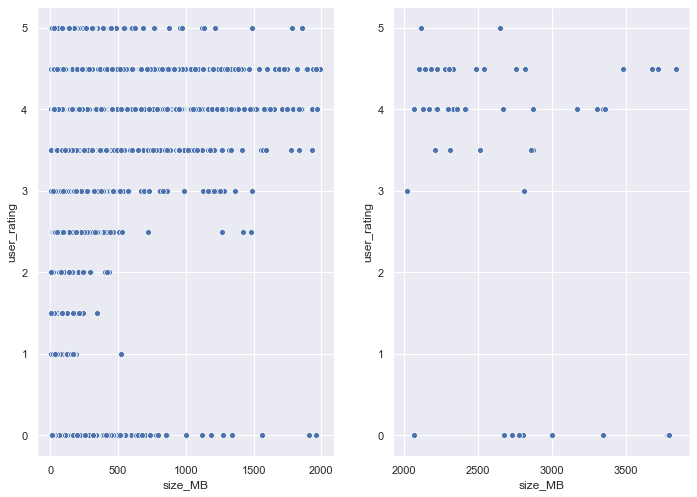

In [14]:
#Size vs. Rating

%matplotlib inline
import seaborn as sns



sns.set(rc={'figure.figsize':(11.7,8.27)})

#Splitting the dataset into two: 1. with size <= 2000 MB 2. With size > 2000 MB
size_2000 = app_store[(app_store["size_MB"]<=2000)]
print("Number of apps with size <= 2000 MB = ", size_2000.shape[0])
size_above_2000 = app_store[(app_store["size_MB"]>2000)]
print("Number of apps with size > 2000 MB = ",size_above_2000.shape[0])
#Plotting using seaborn
#sns.set(style="pastel")

fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=size_2000,x="size_MB", y="user_rating",ax=ax[0])
sns.scatterplot(data=size_above_2000,x="size_MB", y="user_rating",ax=ax[1])
plt.show()

Total number of free apps =  4056
Total number of paid apps =  3141


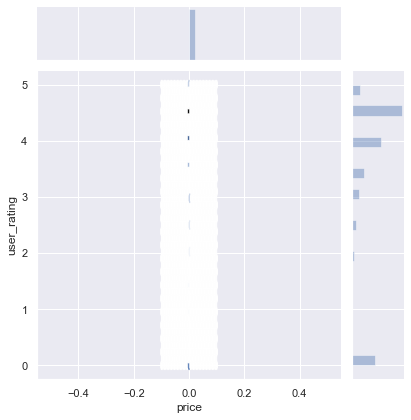

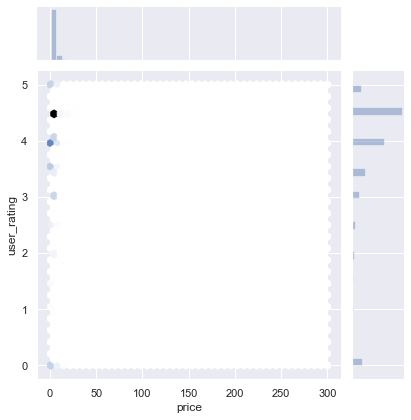

In [15]:
#Price vs. Rating

#Free apps
free = app_store[app_store["price"]==0.00]
print("Total number of free apps = ",free.shape[0])
paid = app_store[app_store["price"]!=0.00]
print("Total number of paid apps = ",paid.shape[0])

#Visualizing
sns.set_style("darkgrid")

sns.jointplot(data=free,x="price", y="user_rating",kind="hex")
sns.jointplot(data=paid,x="price", y="user_rating",kind="hex")
plt.show()

#### SIZE
1. Less than or equal to 2000 MB
There are 7141 apps with size less than or equal to 2000 MB. And majority of them have a rating above 2.5. Some have ratings below 2.5. 
2. Greater than 2000 MB 
There are 56 apps with size greater than 2000 MB. Surprisingly, these large sized apps don't have ratings below 3. This suggests that large sized apps have high quality content.

Overall, the majority of top rated apps range from 0.5 MB to 2000 MB

#### PRICE
1. Free
There are 4056 free apps. And vast majority of free apps have a rating of 4 or 4.5
2. Paid
There are around 3141 priced apps and majority of them are priced under 30$. Most of them have a rating of 4.5

From this, it can be concluded that size and price does not affect the rating.

### RELATION BETWEEN APP GENRE AND PRICE

Choosing the right price determines the success of an app. Overpriced apps with few features could turn off the users even before they donload it. Underpriced apps with more features could lead to loss in your business. Different genres have different price ranges. Finding the right price for your app's genre is crucial to make a profit.


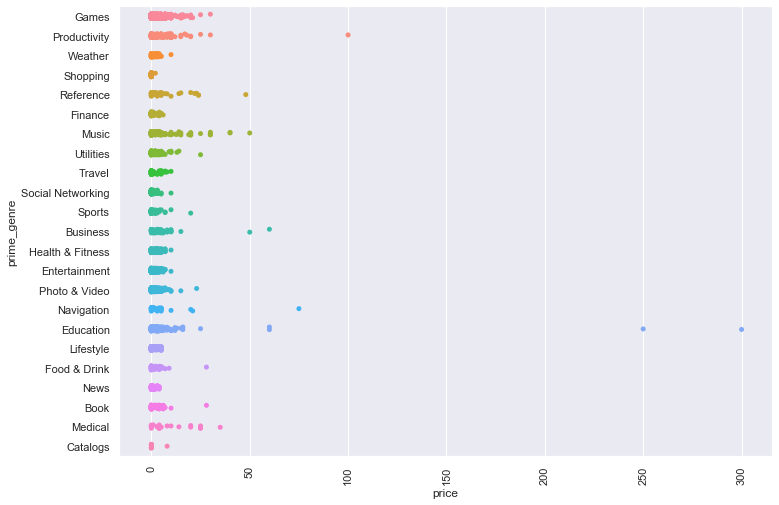

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.stripplot(x="price", y="prime_genre", data=app_store)
plt.xticks(rotation=90)
plt.show()



In [17]:
#Highly priced apps
high_price = app_store[app_store["price"]>100]
high_price

,id,track_name,size_MB,currency,price,rating_count_tot,user_rating,cont_rating,prime_genre
129,308368164,Proloquo2Go - Symbol-based AAC,690.24,USD,249.99,773,4.0,4+,Education
1714,551215116,LAMP Words For Life,556.24,USD,299.99,41,4.0,4+,Education


There are only 2 apps that are priced above 100$ and they both belong to the education genre. 